In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# 1️⃣ Carregar os dados (substitua pelo seu arquivo real)
df = pd.read_excel("dados_pickup.xlsx")

In [7]:
# 2️⃣ Pré-processamento dos dados
df.drop(columns=["ID", "Nome_do_Produto"], inplace=True, errors='ignore')  # Ajuste conforme os nomes reais


In [8]:
# Tratar valores nulos
df.fillna(0, inplace=True)

In [9]:
# Transformar colunas categóricas em numéricas (One-Hot Encoding)
df = pd.get_dummies(df)

In [10]:
# 3️⃣ Definir variáveis de entrada (X) e saída (y)
X = df.drop(columns=["Perda_Material"])  # 🚨 Ajuste para o nome real da sua variável de perda
y = df["Perda_Material"]  # Variável alvo (0 = Sem perda, 1 = Perda)

In [11]:
# 4️⃣ Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 5️⃣ Treinar o modelo Naive Bayes (GaussianNB para dados contínuos, BernoulliNB para dados binários)
modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

In [13]:
# 6️⃣ Fazer previsões
y_pred = modelo.predict(X_test)

In [14]:
# 7️⃣ Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.975

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        23

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



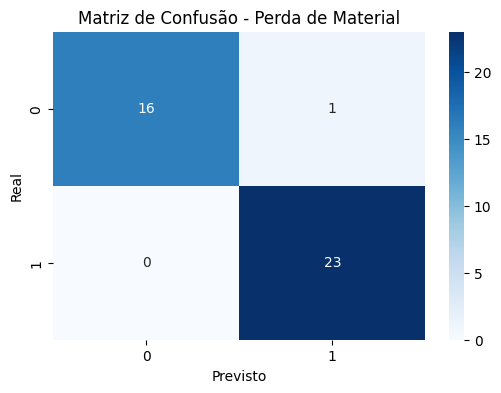

In [15]:
# 8️⃣ Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Perda de Material")
plt.show()